# Case Study - Bellabeat Data Analysis

# Introduction
Bellabeat is a high-tech manufacturer of health-focused smart products for women. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. The range of products they offer are:
* **Bellabeat app:** The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.
* **Leaf:** Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.
* **Time:** This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.

* **Spring:** This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.

* **Bellabeat membership:** Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

# Business Task
Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices. And then select one Bellabeat product to apply these insights to.


# Data Source
FitBit Fitness Tracker Data (http://www.kaggle.com/arashnic/fitbit): This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

Limitations with the dataset:

* Unknown Demographics: Demographics of the users are not recorded in the dataset.
* Small sample size: The data contains only 30 Fitbit users.
* Small dataset: Only one month of activity data is available

# Data Processing

In [1]:
#Loading packages
library(tidyverse)
library(reshape2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



In [2]:
#Importing datasets
daily_activity <- read.csv("C:/Users/chack/Desktop/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep_day <- read.csv("C:/Users/chack/Desktop/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_intensities<-read.csv("C:/Users/chack/Desktop/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

In [3]:
#Viewing data
head(sleep_day)
head(hourly_intensities)
head(daily_activity)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,ActivityHour,TotalIntensity,AverageIntensity
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [4]:
n_distinct(daily_activity$Id)
n_distinct(sleep_day$Id)
n_distinct(hourly_intensities$Id)

[1] 33

[1] 24

[1] 33

In [5]:
#Finding the number of observations in each dataframe
nrow(daily_activity)
nrow(sleep_day)
nrow(hourly_intensities)

[1] 940

[1] 413

[1] 22099

In [6]:
#Changing the format of date
daily_activity$ActivityDate <- as.POSIXct(daily_activity$ActivityDate, format="%m/%d/%Y", tz="UTC")
hourly_intensities$ActivityHour=as.POSIXct(hourly_intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz="UTC")
sleep_day$SleepDay=as.POSIXct(sleep_day$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz="UTC")
hourly_intensities$Time <- format(hourly_intensities$ActivityHour, format = "%H:%M:%S")
hourly_intensities$Date <- format(hourly_intensities$ActivityHour, format = "%m/%d/%y")
sleep_day$Date <- format(sleep_day$SleepDay, format = "%m/%d/%y")
sleep_day$Day <- weekdays(sleep_day$SleepDay)
sleep_day$Day <- ordered(sleep_day$Day, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
hourly_intensities$day <- weekdays(hourly_intensities$ActivityHour)
hourly_intensities$day <- ordered(hourly_intensities$day, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

In [7]:
#Removing duplicate entries
daily_activity <- daily_activity %>% distinct()
sleep_day <- sleep_day %>% distinct()
hourly_intensities <- hourly_intensities %>% distinct()

In [8]:
nrow(daily_activity)
nrow(sleep_day)
nrow(hourly_intensities)

[1] 940

[1] 410

[1] 22099

We can see here that duplicate entries have been removed from *sleep_day*. (The no. of entries changed from 413 to 410)

In [9]:
#Converting minutes to hours
sleep_day<- sleep_day %>% 
    mutate(TotalHoursAsleep= TotalMinutesAsleep/60) %>% 
    mutate(TotalHoursInBed = TotalTimeInBed/60) %>%
    mutate(MinutesNotAsleepInBed = TotalTimeInBed - TotalMinutesAsleep)
daily_activity<- daily_activity %>% 
    mutate(SedentaryHours= SedentaryMinutes/60)

# Analyze Data

In [10]:
#Analyzing sleep_day dataframe
sleep_day %>%  
  select(TotalSleepRecords,
  TotalHoursAsleep,
  TotalHoursInBed, MinutesNotAsleepInBed) %>%
  summary()

 TotalSleepRecords TotalHoursAsleep  TotalHoursInBed  MinutesNotAsleepInBed
 Min.   :1.00      Min.   : 0.9667   Min.   : 1.017   Min.   :  0.00       
 1st Qu.:1.00      1st Qu.: 6.0167   1st Qu.: 6.729   1st Qu.: 17.00       
 Median :1.00      Median : 7.2083   Median : 7.717   Median : 25.50       
 Mean   :1.12      Mean   : 6.9862   Mean   : 7.641   Mean   : 39.31       
 3rd Qu.:1.00      3rd Qu.: 8.1667   3rd Qu.: 8.767   3rd Qu.: 40.00       
 Max.   :3.00      Max.   :13.2667   Max.   :16.017   Max.   :371.00       

* The average minutes people lay awake in bed = 39.31 mins
* On an average people sleep ~7 hrs

In [11]:
daily_activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryHours) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryHours 
 Min.   :    0   Min.   : 0.000   Min.   : 0.00  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:12.16  
 Median : 7406   Median : 5.245   Median :17.62  
 Mean   : 7638   Mean   : 5.490   Mean   :16.52  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:20.49  
 Max.   :36019   Max.   :28.030   Max.   :24.00  

* Average Steps taken = 7638
* Average Sedentary Hours = 16.52 hours

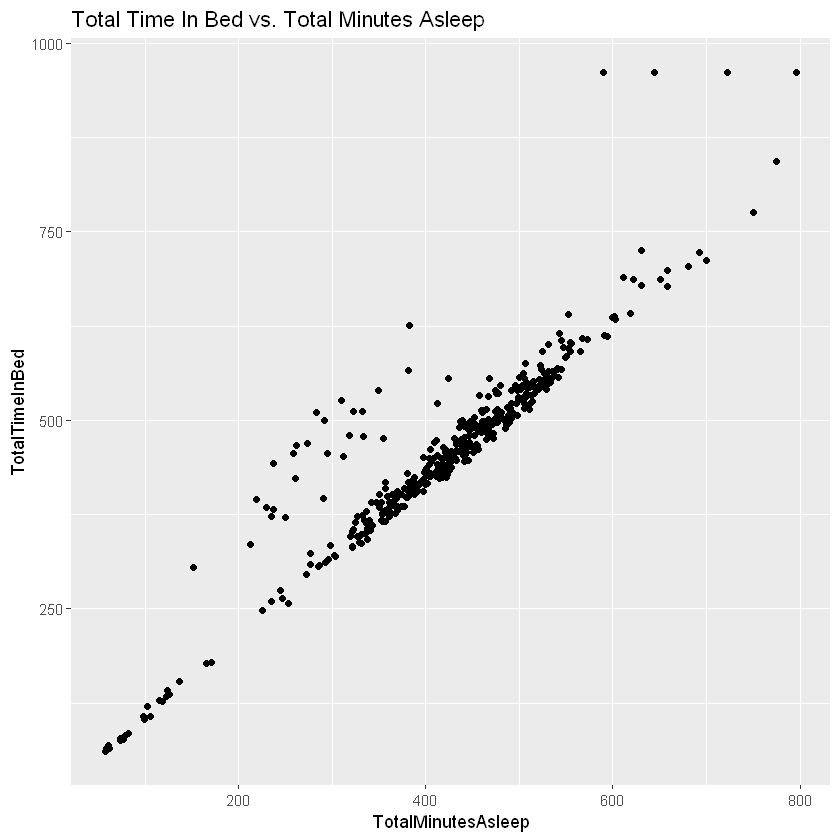

In [12]:
ggplot(data=sleep_day, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + geom_point() + labs(title="Total Time In Bed vs. Total Minutes Asleep")

There is a linear relation between TotalTimeInBed and TotalMinutesAsleep.

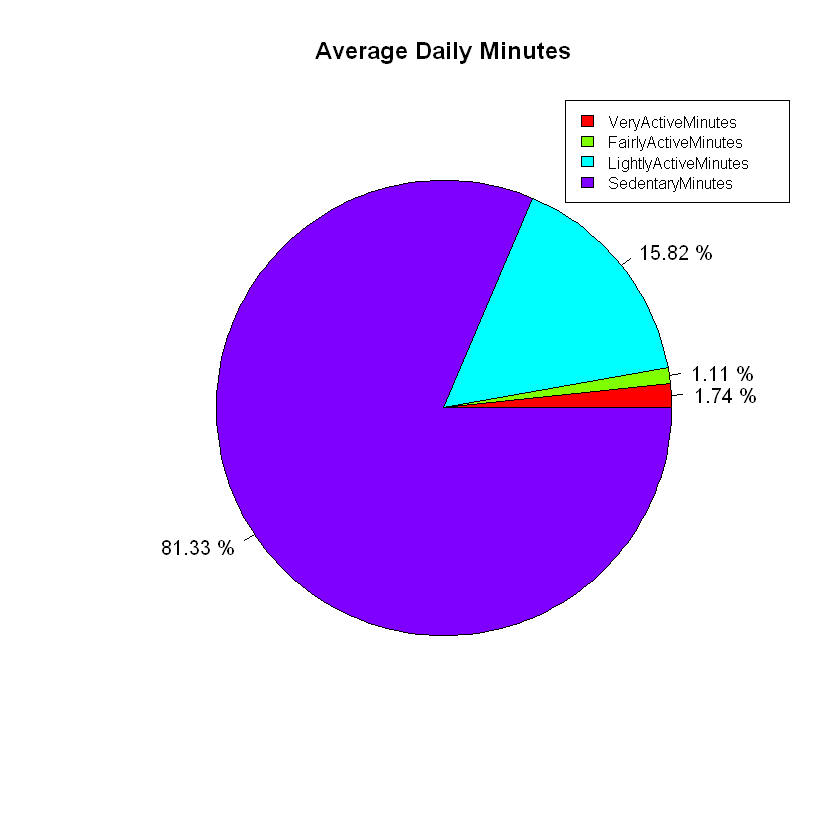

In [13]:
#Pie Chart
x <- c(mean(daily_activity$VeryActiveMinutes), mean(daily_activity$FairlyActiveMinutes), mean(daily_activity$LightlyActiveMinutes), mean(daily_activity$SedentaryMinutes))
labels <- c("VeryActiveMinutes","FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes")
pie(x, labels = paste(round(100*x/sum(x), 2), "%"), main="Average Daily Minutes", col=rainbow(length(x)))
legend("topright", c("VeryActiveMinutes","FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes"), cex = 0.8, fill=rainbow(length(x)))

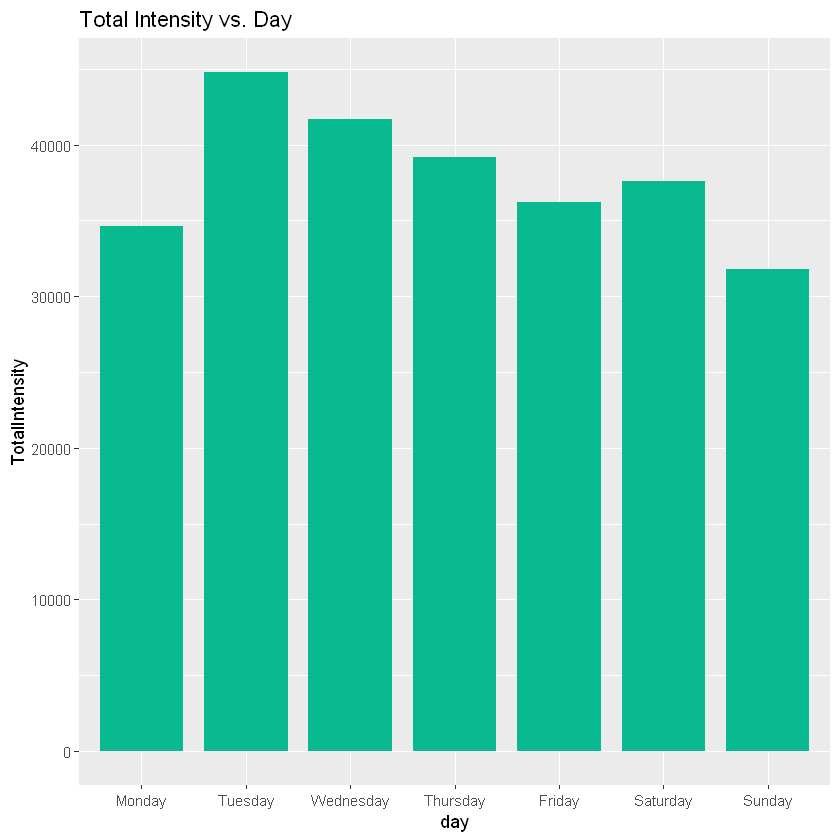

In [14]:
ggplot(hourly_intensities, aes(x=day, y=TotalIntensity)) + geom_bar(stat="identity", width=0.8, fill = "#09ba91") + labs(title="Total Intensity vs. Day")

From the graph, we can see that Sundays are the least active days.

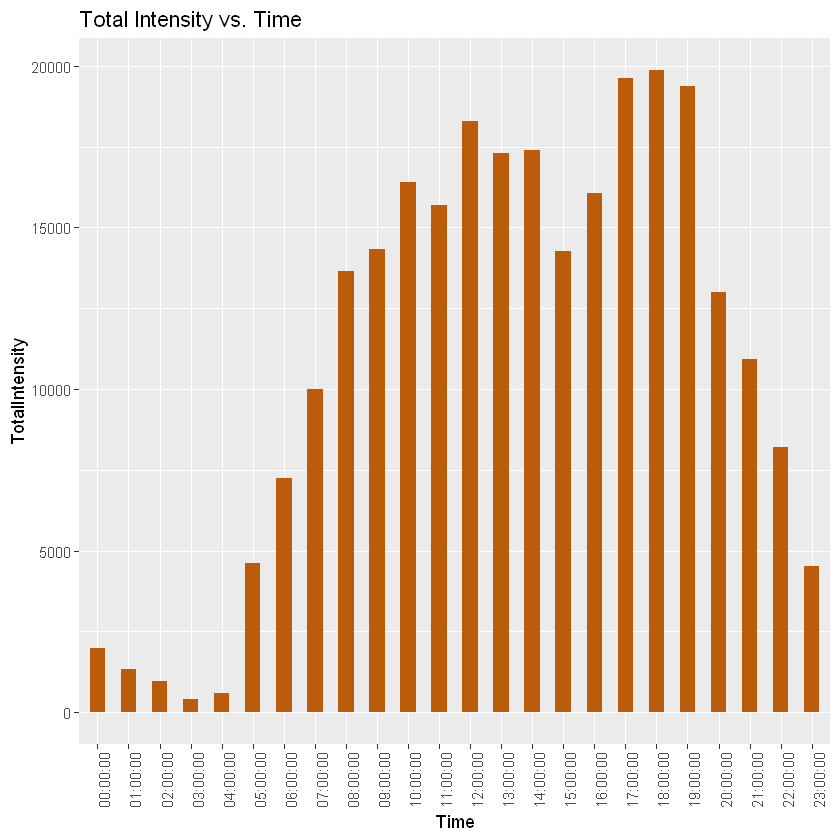

In [15]:
ggplot(hourly_intensities, aes(x=Time, y=TotalIntensity)) + theme(axis.text.x = element_text(angle = 90)) + geom_bar(stat="identity", width=0.5, fill = "#ba5c09") + labs(title="Total Intensity vs. Time")

Most of the activity takes place between 05.00 pm and 07.00 pm.

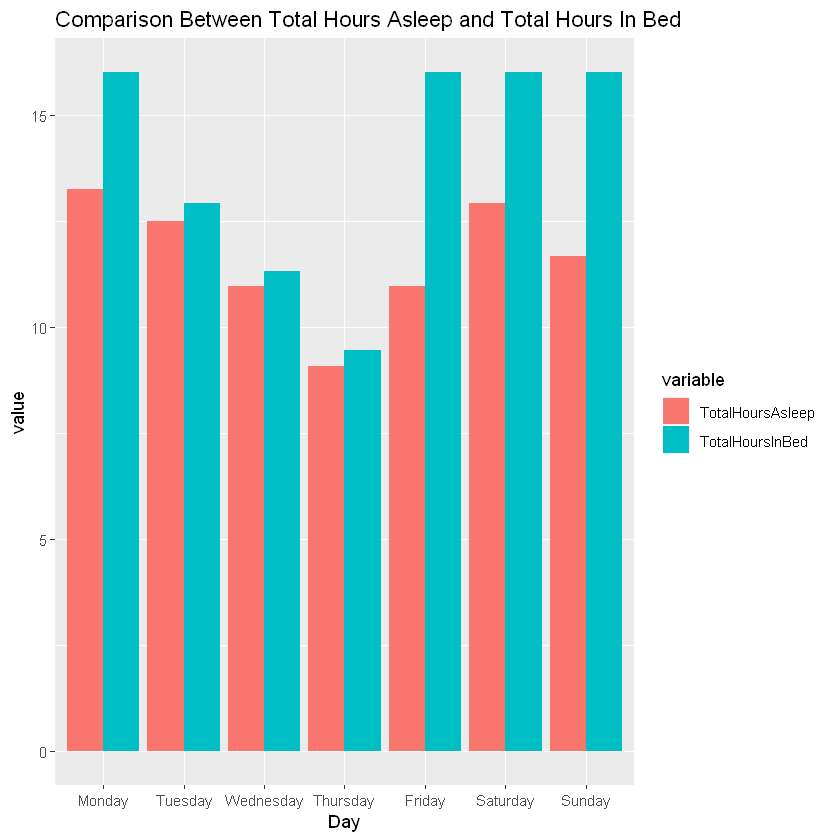

In [16]:
sleep <- melt(sleep_day[,c('Day','TotalHoursAsleep','TotalHoursInBed')],id.vars = 1)
ggplot(sleep,aes(x = Day,y = value)) + geom_bar(aes(fill = variable),stat = "identity",position = "dodge") + labs(title="Comparison Between Total Hours Asleep and Total Hours In Bed")

# Summary
The insights obtained from the analysis are:

* Average Steps taken by a user daily = 7638, which is low and needs to be improved.
* Average Sedentary Hours = 16.52 hours, this needs to be reduced.
* The users are least active on Sundays.
* On an average, the users lay awake in bed ~40 mins, this indicates that users find it difficult to fall asleep.
* Also, the users only sleep ~7 hrs a day which is less and needs improvement.

Based on the above insights, here are a few recommendations for the Bellabeat App:
* The app can ask users to set goals for their daily activities (no. of steps they plan on taking daily, time when they plan to sleep, etc). And notify them about their goal.
* The app can provide a weekly analysis to the user based on their data for each week. This will help the user to self reflect and make healthy decisions.